In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df_energy = pd.read_csv("D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_data_energy(15days).csv")

In [29]:
df_weather = pd.read_csv("D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_data_weather.csv")

In [30]:
df_energy.head(5)

,group,Date,KWH,Next_3_Days_Energy_Total
0,1,2012-09-28,920.374,1031.111000
1,1,2012-09-29,946.774,1045.833000
2,1,2012-09-30,997.614,1059.146667
3,1,2012-10-01,932.968,1051.590333
4,1,2012-10-02,923.616,1039.082667


In [31]:
print(df_energy.isnull().sum())

group                         0
Date                          0
KWH                         253
Next_3_Days_Energy_Total      0
dtype: int64


In [32]:
df_weather.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [33]:
print(df_weather.isnull().sum())

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


In [34]:
df_weather.rename(columns={'date': 'Date'}, inplace=True)
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y%m%d')

In [35]:
df_energy['Date'] = pd.to_datetime(df_energy['Date'])

In [36]:
df_energy.head(5)

,group,Date,KWH,Next_3_Days_Energy_Total
0,1,2012-09-28,920.374,1031.111000
1,1,2012-09-29,946.774,1045.833000
2,1,2012-09-30,997.614,1059.146667
3,1,2012-10-01,932.968,1051.590333
4,1,2012-10-02,923.616,1039.082667


In [37]:
df_weather.head(5)

,Date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


#### merge the data

In [38]:
merged_df = pd.merge(df_energy, df_weather, on='Date', how='left')

In [39]:
merged_df.head(10)

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1,2012-09-28,920.374,1031.111000,5.0,1.6,73.0,16.7,13.3,8.5,0.2,101300.0,0.0
1,1,2012-09-29,946.774,1045.833000,1.0,8.7,146.0,18.1,12.7,8.6,0.0,101830.0,0.0
2,1,2012-09-30,997.614,1059.146667,5.0,1.6,71.0,17.3,12.1,6.1,4.2,101870.0,0.0
3,1,2012-10-01,932.968,1051.590333,6.0,2.7,85.0,17.9,15.2,13.0,2.6,101190.0,0.0
4,1,2012-10-02,923.616,1039.082667,6.0,2.8,85.0,15.1,14.4,10.9,1.2,100970.0,0.0
5,1,2012-10-03,903.401,1014.542333,7.0,1.6,69.0,16.4,13.1,11.0,4.6,100560.0,0.0
6,1,2012-10-04,927.676,1024.092333,3.0,7.5,128.0,15.8,11.4,6.4,6.2,100820.0,0.0
7,1,2012-10-05,1018.991,1032.676667,8.0,1.1,60.0,15.3,13.2,10.5,17.6,100700.0,0.0
8,1,2012-10-06,1006.704,1109.996333,4.0,7.9,128.0,13.8,11.4,7.5,0.2,101300.0,0.0
9,1,2012-10-07,1055.486,1140.037333,3.0,3.2,84.0,12.7,9.3,4.7,0.0,101790.0,0.0


In [40]:
merged_df.tail(10)

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
27318,55,2014-01-29,1192.598,1151.942667,8.0,0.0,18.0,6.0,4.8,4.7,18.8,99400.0,0.0
27319,55,2014-01-30,1183.161,1164.703000,7.0,0.0,19.0,9.5,4.7,3.4,0.2,100180.0,0.0
27320,55,2014-01-31,1166.323,1156.939333,8.0,0.0,19.0,9.1,5.3,1.1,19.8,99840.0,0.0
27321,55,2014-02-01,1119.249,1152.727667,3.0,5.6,65.0,10.2,5.6,2.0,0.0,99000.0,0.0
27322,55,2014-02-02,1143.012,1108.914667,2.0,7.0,74.0,8.8,7.6,4.9,0.0,100530.0,0.0
27323,55,2014-02-03,1089.332,1070.176000,3.0,1.0,34.0,9.4,6.1,3.4,0.0,100370.0,0.0
27324,55,2014-02-04,1061.265,1018.218000,5.0,3.9,57.0,10.1,6.8,4.2,11.2,99670.0,0.0
27325,55,2014-02-05,1106.654,1010.964667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27326,55,2014-02-06,1119.021,993.217000,5.0,0.0,21.0,9.8,8.4,6.7,19.0,98980.0,0.0
27327,55,2014-02-07,1107.229,997.178000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
merged_df.shape

(27328, 13)

In [42]:
print(merged_df.isnull().sum())

group                         0
Date                          0
KWH                         253
Next_3_Days_Energy_Total      0
cloud_cover                 440
sunshine                    440
global_radiation            440
max_temp                    440
mean_temp                   440
min_temp                    440
precipitation               440
pressure                    440
snow_depth                  440
dtype: int64


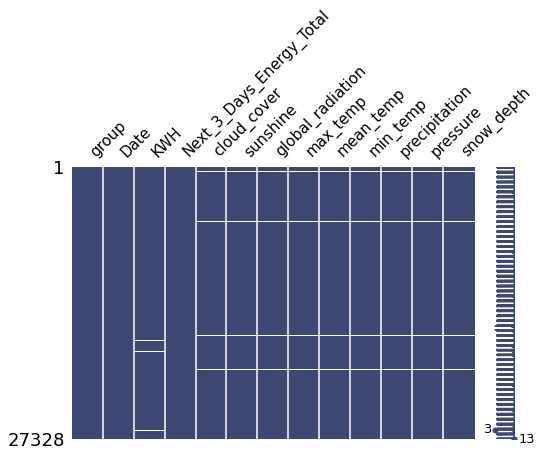

In [43]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(merged_df, figsize=(8,5), fontsize=15, color=(0.237, 0.286, 0.45))
plt.show()

In [44]:
from sklearn.impute import KNNImputer

columns_with_missing_values = merged_df.columns[merged_df.isnull().any()].tolist()
imputer = KNNImputer(n_neighbors=5)  
merged_df[columns_with_missing_values] = imputer.fit_transform(merged_df[columns_with_missing_values])

In [45]:
print(merged_df.isnull().sum())

group                       0
Date                        0
KWH                         0
Next_3_Days_Energy_Total    0
cloud_cover                 0
sunshine                    0
global_radiation            0
max_temp                    0
mean_temp                   0
min_temp                    0
precipitation               0
pressure                    0
snow_depth                  0
dtype: int64


In [46]:
merged_df.head

<bound method NDFrame.head of        group       Date       KWH  Next_3_Days_Energy_Total  cloud_cover  \
0          1 2012-09-28   920.374               1031.111000          5.0   
1          1 2012-09-29   946.774               1045.833000          1.0   
2          1 2012-09-30   997.614               1059.146667          5.0   
3          1 2012-10-01   932.968               1051.590333          6.0   
4          1 2012-10-02   923.616               1039.082667          6.0   
...      ...        ...       ...                       ...          ...   
27323     55 2014-02-03  1089.332               1070.176000          3.0   
27324     55 2014-02-04  1061.265               1018.218000          5.0   
27325     55 2014-02-05  1106.654               1010.964667          6.2   
27326     55 2014-02-06  1119.021                993.217000          5.0   
27327     55 2014-02-07  1107.229                997.178000          5.8   

       sunshine  global_radiation  max_temp  mean_temp  m

In [47]:
merged_df.columns

Index(['group', 'Date', 'KWH', 'Next_3_Days_Energy_Total', 'cloud_cover',
       'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [48]:
def remove_outliers(df, col_name, method='iqr', k = 0):
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + k*iqr
    lower_threshold = q1 - k*iqr
    outliers = (df[col_name] > upper_threshold) | (df[col_name] < lower_threshold)
    
    df = df[~outliers].reset_index(drop=True)
    return df

In [49]:
col = ['KWH', 'Next_3_Days_Energy_Total', 'sunshine', 'global_radiation', 'max_temp','mean_temp', 'min_temp', 'pressure']

for col in merged_df[col]:
    df = remove_outliers(merged_df, col, method='iqr', k=1.5)

In [50]:
df.head

<bound method NDFrame.head of        group       Date       KWH  Next_3_Days_Energy_Total  cloud_cover  \
0          1 2012-09-28   920.374               1031.111000          5.0   
1          1 2012-09-29   946.774               1045.833000          1.0   
2          1 2012-09-30   997.614               1059.146667          5.0   
3          1 2012-10-01   932.968               1051.590333          6.0   
4          1 2012-10-02   923.616               1039.082667          6.0   
...      ...        ...       ...                       ...          ...   
27323     55 2014-02-03  1089.332               1070.176000          3.0   
27324     55 2014-02-04  1061.265               1018.218000          5.0   
27325     55 2014-02-05  1106.654               1010.964667          6.2   
27326     55 2014-02-06  1119.021                993.217000          5.0   
27327     55 2014-02-07  1107.229                997.178000          5.8   

       sunshine  global_radiation  max_temp  mean_temp  m

In [51]:
inf_check = np.isinf(df)
print(inf_check.any())

group                       False
Date                        False
KWH                         False
Next_3_Days_Energy_Total    False
cloud_cover                 False
sunshine                    False
global_radiation            False
max_temp                    False
mean_temp                   False
min_temp                    False
precipitation               False
pressure                    False
snow_depth                  False
dtype: bool


In [52]:
nan_check = df.isna()
print(nan_check.any())

group                       False
Date                        False
KWH                         False
Next_3_Days_Energy_Total    False
cloud_cover                 False
sunshine                    False
global_radiation            False
max_temp                    False
mean_temp                   False
min_temp                    False
precipitation               False
pressure                    False
snow_depth                  False
dtype: bool


In [53]:
df.to_csv('D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_merged_data.csv', index=False)